# Homework 3: EDA. Interactive visualizations

У цьому домашньому завданні ми будемо працювати з набором даних, що містить ціни на будинки в місті Еймс штату Айова.    
Дані можна знайти у `data/ames_house_prices/`. Опис даних – у `data/ames_house_prices/data_description.txt`. Прочитайте опис змінних перед виконанням завдання, ми будемо користуватися ним, щоб зрозуміти дані.  
Дані взяті зі [змагання](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) на Kaggle.

Цей набір даних має багато ознак – все як у реальному житті. І ми будемо аналізувати закономірності у цьому наборі даних.
У цьому ДЗ ми відпрацюємо деякі етапи EDA, тому що з функціоналом для його виконання ви вже частково знайомі. Етапи повного EDA були розглянуті у лекції.

0. У процесі роботи розміщуйте угорі ноутбука, імпорт усіх необхідних вам бібліотек. Це добрий стиль ведення ноутбука.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

1. Завантажте `train.csv` у змінну `df_train`.

In [2]:
 df_train = pd.read_csv('/Users/vitamajstrenko/Desktop/3/house-prices-advanced-regression-techniques/train.csv')

2. Виведіть інформацію про колонки у наборі даних, їх типах, кількості **не** null значень у кожній колонці та формі набору даних.

In [3]:
#  про колонки у наборі даних
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [34]:
# кількість не null значень у кожній колонці
pd.set_option('display.max_columns', 82)
df_train.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinSF1       1460
BsmtFinType2     1422
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1459
1stFlrSF         1460
2ndFlrSF         1460
LowQualFin

In [5]:
# формa набору даних
df_train.shape

(1460, 81)

3. Задача, яку ми розглядаємо – це задачі регресії. Наша цільова змінна – `SalePrice`. І у задачі регресії потрібно буде її передбачити. Нам важливо зрозуміти, як вона розподілена та як взаємодіє з іншими змінними.
Найкраще моделюються змінні, близькі до нормального розподілу.

3.1. Побудуйте функцію щільності (розподіл даних) `SalePrice` за допомогою `seaborn`.

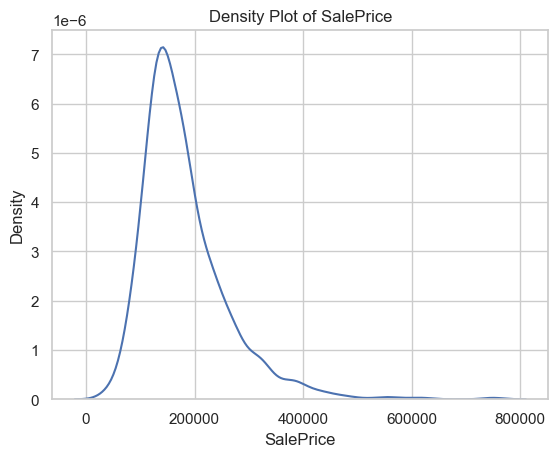

In [6]:
def plot_density(df_train):
    # Встановлюємо стиль графіку
    sns.set(style="whitegrid")

    # Побудова щільності (розподілу даних)
    sns.kdeplot(df_train["SalePrice"])

    # Налаштування осей та заголовка
    plt.xlabel("SalePrice")
    plt.ylabel("Density")
    plt.title("Density Plot of SalePrice")

    # Відображення графіку
    plt.show()

# Припустимо, що ваш датасет знаходиться у змінній dataset
plot_density(df_train)

In [7]:
# на цьому етапі, можна вже побачити, що дані містять щось схоже на "викиди" в частині - дуже дорогих помешкань 
# (права сторона графіку розподілу), хоча викидів з боку "дешевих" помешкань - значно менше.

3.2. Виведіть асиметрію та ексцес (на англ. - skewness and kurtosis) для `SalePrice` (не візуально, відповідь у числовому форматі).

In [8]:
skewness = df_train["SalePrice"].skew()
skewness

1.8828757597682129

In [9]:
kurtosis = df_train["SalePrice"].kurtosis()
kurtosis

6.536281860064529

In [10]:
# значення асиметрії 1.88 - позитивне, що означає, що розподіл даних має правосторонню асиметрію. 
# тобто існують високі значення "SalePrice" на правому кінці розподілу, але низьких значень на лівому кінці менше - лінія на графіку, 
# як на мене це ж піжтверджує:)
# значення ексцесу 6.54 позитивне, що означає, що розподіл даних має високі вершини та виражені важкі хвости. 
# тобто дані мають значення, які відхиляються від нормального розподілу і можуть бути більш концентрованими навколо середнього значення

Бачимо, що змінну зміщено. Те, наскільки вона схожа на нормальний розподіл, ми навчимося обчислювати трохи пізніше на курсі.

4. Побудуйте матрицю кореляції, яка міститиме цільову змінну `SalePrice` і усі **числові**. Відобразіть її у вигляді теплової карти.

- Матриця може бути трикутною (без верхньої правої частини, яка симетрична нижній лівій), повною або лише один рядок, що містить кореляції зі змінною `SalePrice`. Але обов'язково має бути зафарбована залежно від значення клітини матриці.  


- Числові змінні необхідно вибрати, використовуючи функцію `pandas`, передавати списком буде вважатися неправильним виконанням.  
Якщо на вашу думку деякі змінні необхідно перетворити на числові перед побудовою потрібної в цьому завданні візуалізації – перетворіть, але якщо не перетворите це не буде помилкою.
Суть завдання – виділити функцією лише числові змінні та відобразити матрицю кореляції візуально. Не обов'язково підписувати значення у клітинах матриці кореляції. Нам важливо зрозуміти, з якими ознаками таргет корелює добре, а з якими – ні.


- Фінальний графік має бути зручним для сприйняття, читаним, таким, який ви додали б у презентацію для менеджменту.

In [11]:
# Вибір числових змінних (включаючи цільову змінну SalePrice) (можна перевірити, в рядку, де є df_train.info() 
# відображається dtypes: float64(3), int64(35), object(43) - тобто мажє бути 3+35=38 змінних разом із цільовою)
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

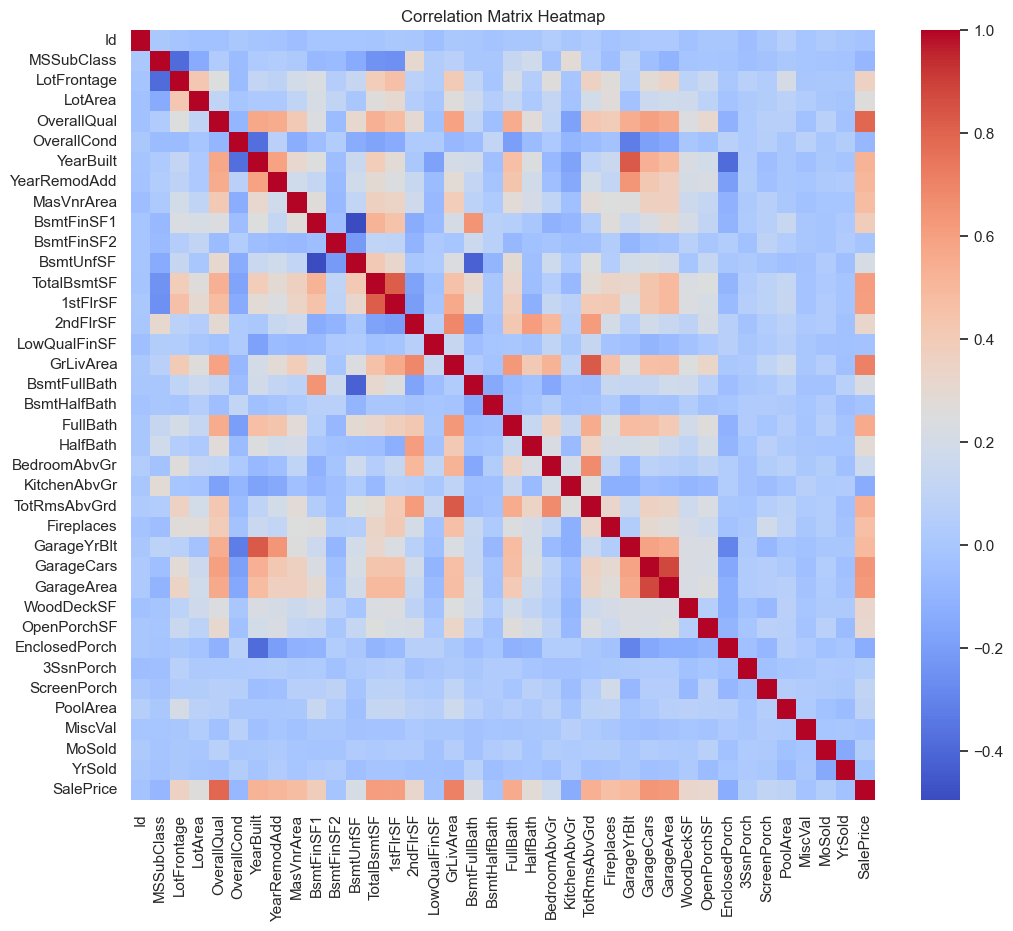

In [12]:
# матриця кореляції
correlation_matrix = df_train[numeric_columns].corr()
# теплова карта
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")

Text(0.5, 1.0, 'Correlation with SalePrice')

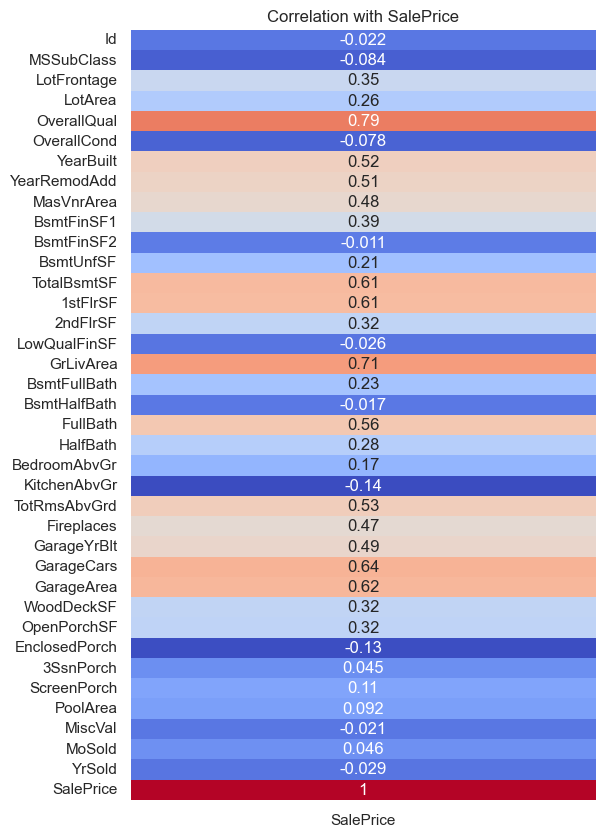

In [13]:
# або одним рядком
correlation_row = correlation_matrix.loc["SalePrice"]
correlation_df = pd.DataFrame(correlation_row)


plt.figure(figsize=(6, 10))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', cbar=False)
plt.title("Correlation with SalePrice")

Які висновки можна зробити із побудованої матриці кореляцій? Які числові ознаки потенційно сильно впливають на цільову змінну, які – ні?

*я б презентувала менеджменту дві матриці : 
1) повну - де видно загальну картину (важливо прибрати значення кореляції для кращої читабельності)
2) матрицю - один рядок - тможна порівняти значення кореляції не лише візуально, а й за допомогою цифр у зручному форматі.

щодо числових ознак, то найбільше впливає на SalePrice змінна OverallQual (Rates the overall material and finish of the house) - тобто чим вища оцінка по зовнішньому вигляду - тим вища ціна продажу (позитивне значення кореляції) - що схоже на правду, адже хто не білив хату перед продажем?)

друга за впливом GrLivArea (Above grade (ground) living area square feet) - розмір житлової площі - за більше по кадратурі помешкання може бути більша ціна.


трохи менше впливають змінні щодо гаража :GarageCars та GarageArea - місткість гаражу вимірювана в машинах (впливає трошечки більше) та площа в кв футах гаража (до речі, гараж може мати велику площу, але дурнувате планування = менше ефективної площі для автомобіля -  це частково пояснює, чому вплив показника GarageCars трошки більший)
водночас, слід зауважити, GarageYrBlt (Year garage was built) - впливає на ціну менше ніж GarageCars та GarageArea(показники теж повʼязані з гаражем)- натомість GarageYrBlt цей показник має сильну кореляцію з роком побудови будинку (бо гараж будують з будинком майже одночасно)
*

4.1. Знайдіть топ 10 змінних (не включаючи саму `SalePrice`), з якими `SalePrice` має найбільшу позитивну кореляцію. Виведіть ці змінні та кореляцію з ними.

In [14]:
top_correlations = correlation_matrix['SalePrice'].nlargest(11)[1:]
top_correlations

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

4.2. Побудуйте теплову карту кореляцій тільки серед змінних `SalePrice` та топ 10, що корелюють із нею. На тепловій карті виведіть числом із двома цифрами після коми міру кореляції між кожною парою змінних.

Text(0.5, 1.0, 'Correlation SalePrice with top 10')

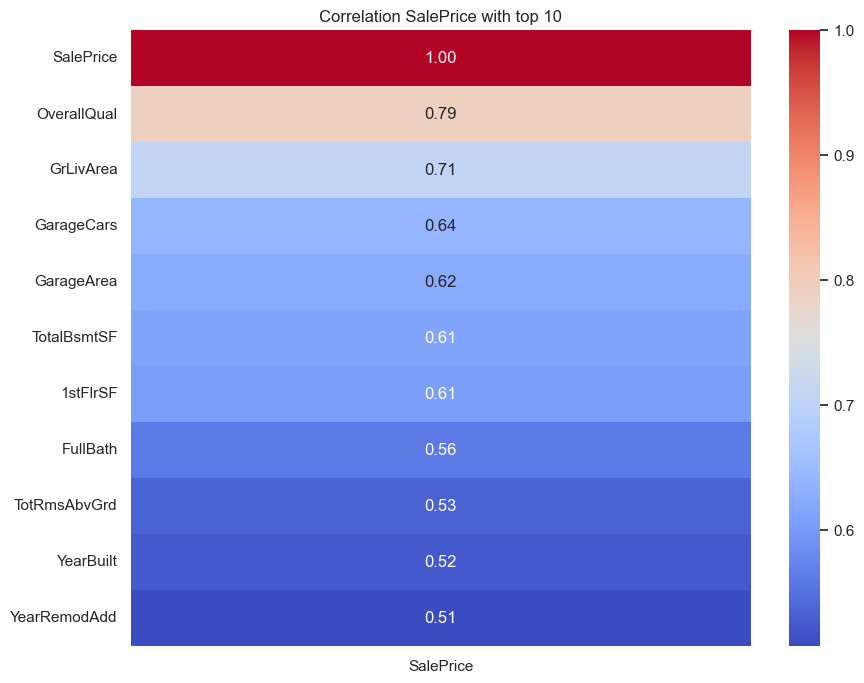

In [15]:
columns_of_interest = ['SalePrice'] + list(top_correlations.index)
correlation_subset = correlation_matrix.loc[columns_of_interest, 'SalePrice':]
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_subset, annot=True, fmt=".2f", cmap='coolwarm')

plt.title("Correlation SalePrice with top 10")

4.3. Проаналізуйте отриманий результат. На вашу думку, чи логічно, що саме ці ознаки найбільше корелюють з цільовою змінною? Обґрунтуйте свою відповідь.

In [16]:
""" На мою думку, отриманий перелік ознак може найбільше корелювати із цільовою змінною, так як вони повʼязані із:
    1)зовнішнім виглядом будинку (оцінка), 
    2)величиною площі (житлової площі, площі підвалу, площі гаража тощо), 
    3)кількістю кімнат (частково відноситься до розмірів, планування) та 
    4)часом побудови. 
    
Керуючись здоровим глуздом, ці змінні можуть впливати на цільову  - ціну будинку."""

' На мою думку, отриманий перелік ознак може найбільше корелювати із цільовою змінною, так як вони повʼязані із:\n    1)зовнішнім виглядом будинку (оцінка), \n    2)величиною площі (житлової площі, площі підвалу, площі гаража тощо), \n    3)кількістю кімнат (частково відноситься до розмірів, планування) та \n    4)часом побудови. \n    \nКеруючись здоровим глуздом, ці змінні можуть впливати на цільову  - ціну будинку.'

5. Побудуйте трикутний pairplot для `SalePrice` і топ 10 ознак у наборі даних, що корелюють з нею.
Додайте лінії тренду до даних (параметр `kind`). По діагоналі виведіть kernel density estimation (kde) змінних.

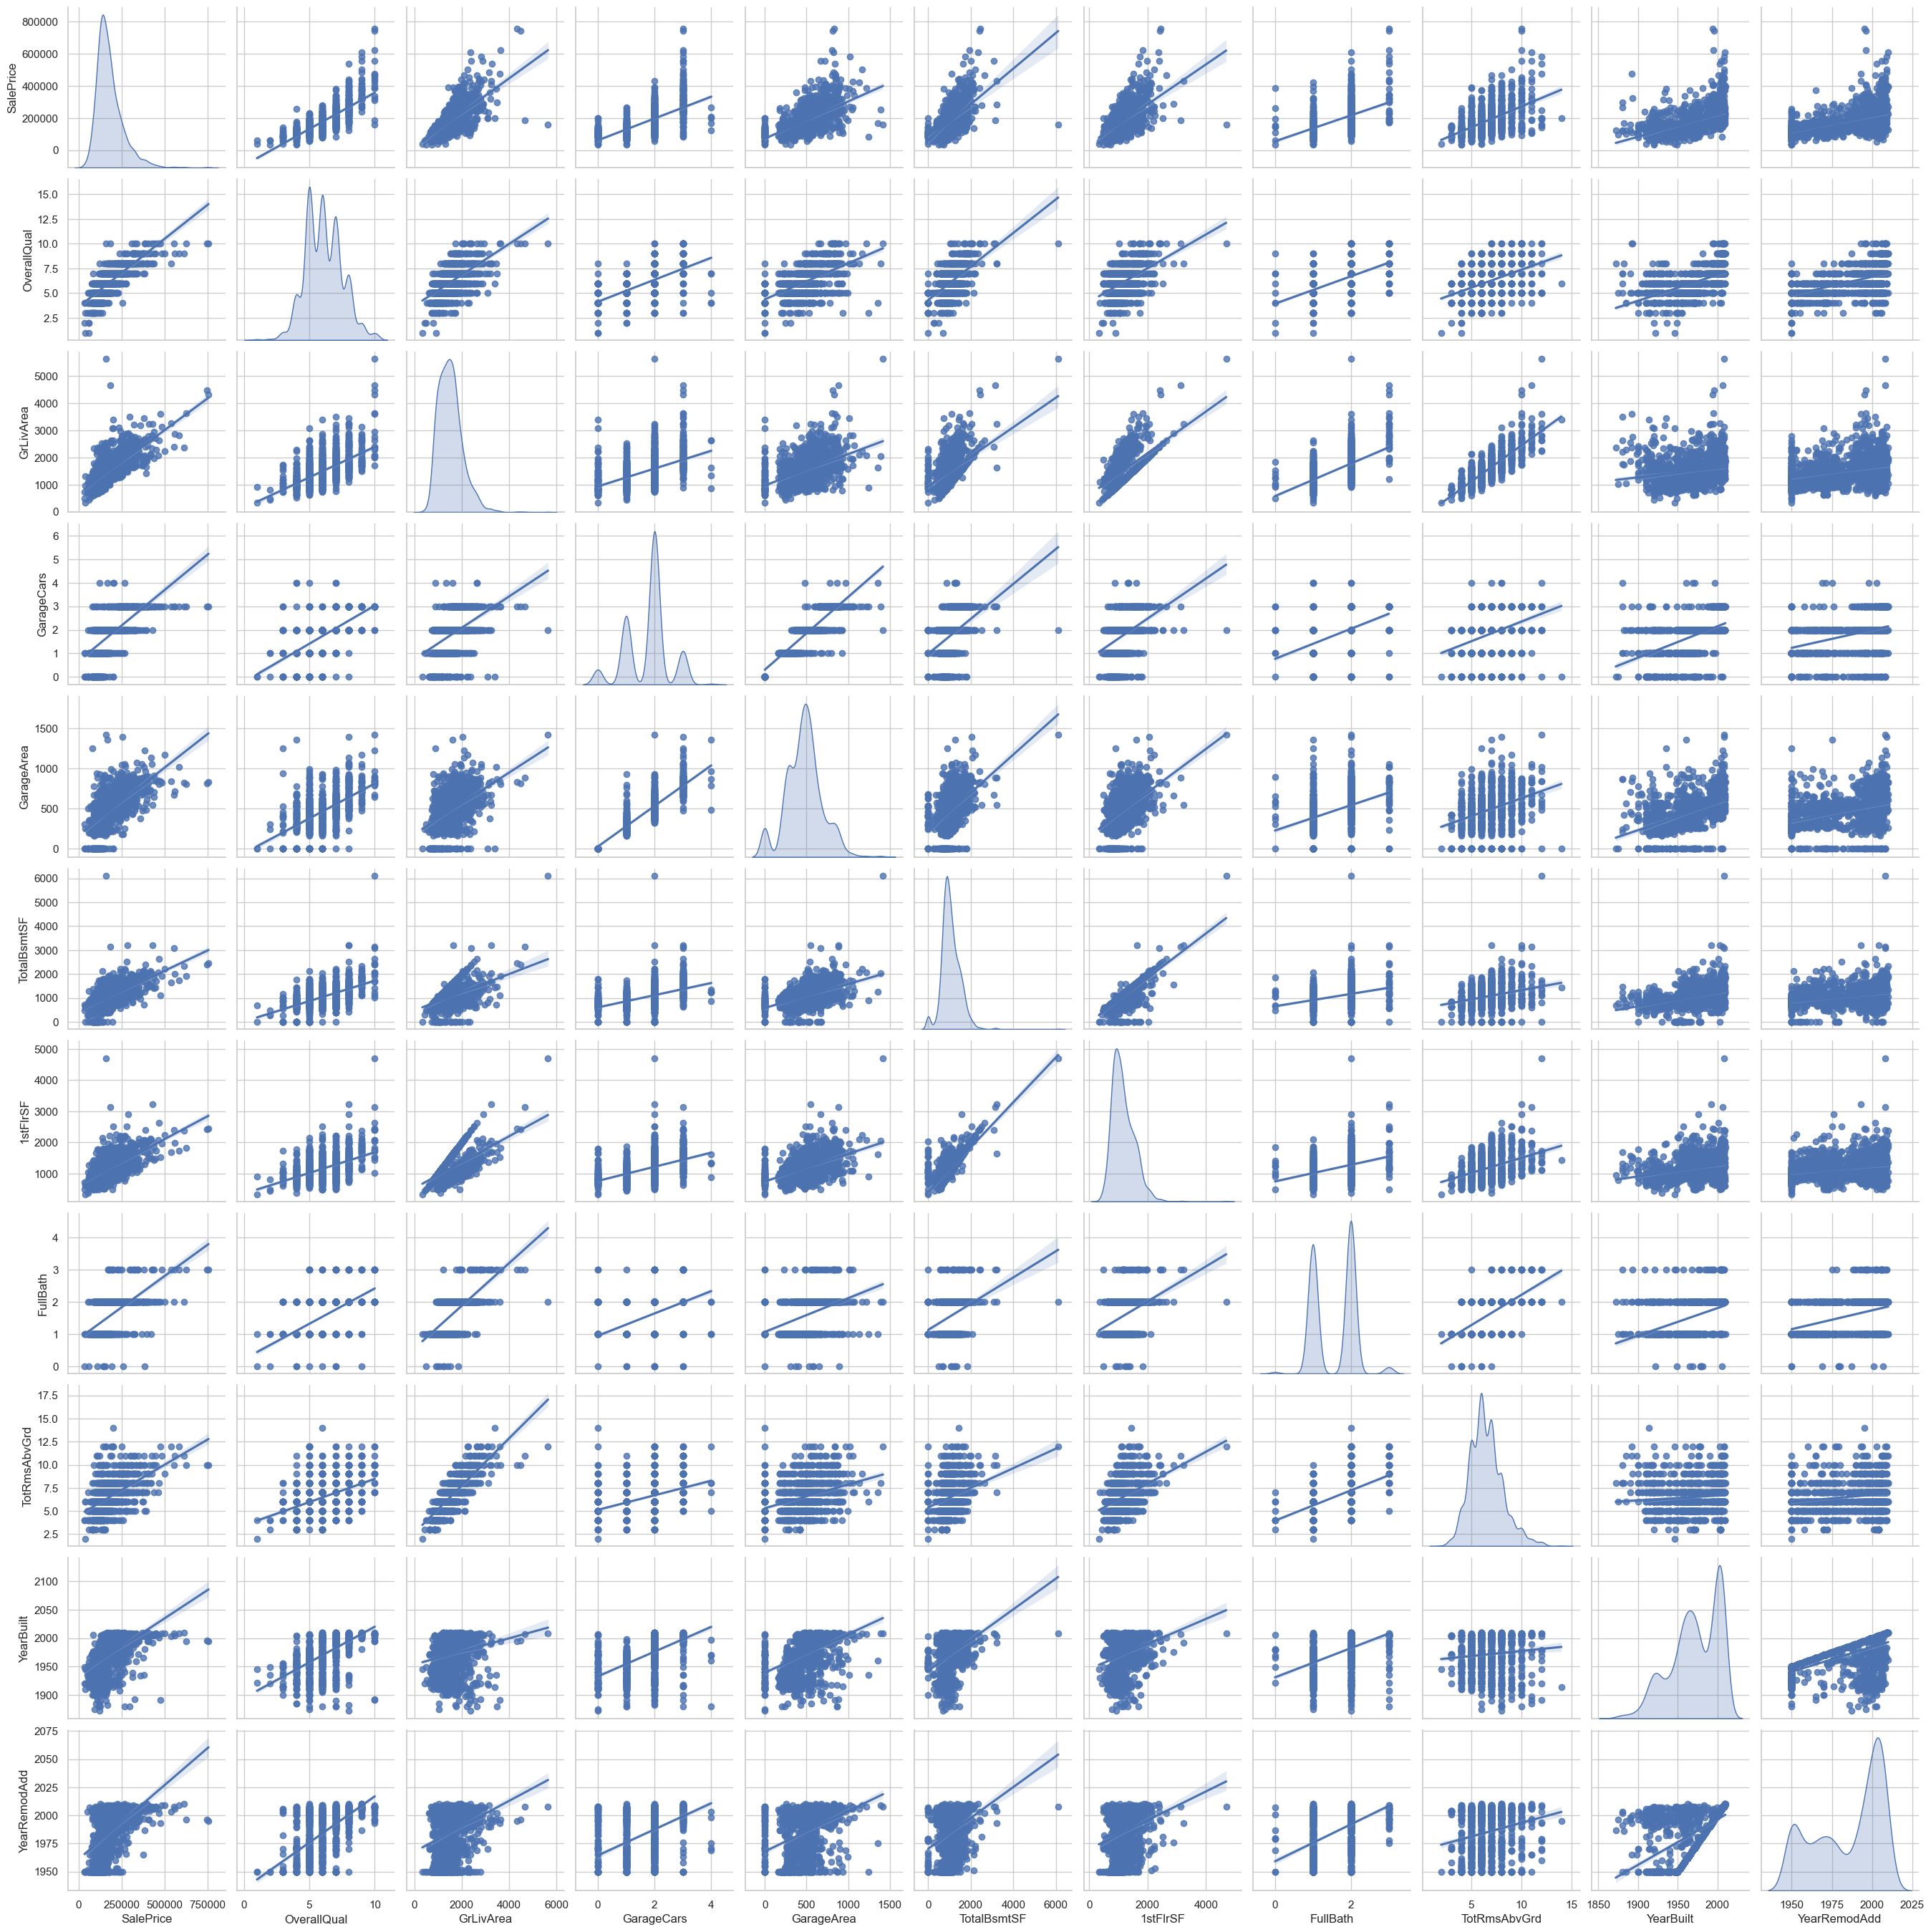

In [17]:
data_subset = df_train[columns_of_interest]
sns.pairplot(data_subset, vars=columns_of_interest, kind='reg', diag_kind='kde')

Ми можемо бачити точки, які начебто не потрапили до загального кластеру. Їх називають аутлаєрами (с англ. outliers) або викидами. Такими є, наприклад, точки з невисокою `SalePrice` і при цьому високе значення `GrLivArea`, або точка зі значенням `TotalBsmtSF` близько 6000 і при цьому низьким `SalePrice`. Давайте розглянемо, що це за точки.

5.1. Виведіть точки з `GrLivArea` строго більше 4000.

In [18]:
filtered_data = df_train[df_train['GrLivArea'] > 4000]
filtered_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


5.2. Не всі колонки помістилися при виведенні? Встановіть параметр `display.max_columns` рівний 100. І виведіть запитувані дані в п.5.1, ще раз, щоб було зручно аналізувати дані.

In [19]:
pd.set_option('display.max_columns', 100)
filtered_data = df_train[df_train['GrLivArea'] > 4000]
filtered_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


5.3. Для даних отриманих у п.5.1 дайте відповідь на питання: чим відрізняються точки з обраних, у яких низька ціна (менше 200000) від тих, у яких ціна висока (більше 700000)?

Щоб легше було дати відповідь на це питання, відкиньте колонки, в яких записи для вибраних рядків однакові у всіх рядках (скрізь одне й те число/рядок/дата). Скільки колонок вийшло через відкидання малоінформативних? Виведіть колонки, що залишилися, і дайте відповідь на задане на початку цього пункту питання.

У відповіді наведіть свої гіпотези (мінімум 3) про відмінності з погляду ознак (які ознаки найбільше впливають на різницю в ціні?). Гіпотези відсортуйте за спаданням гіпотетичного впливу (тобто, на першому місці найбільш робоча гіпотеза на Ваш погляд, на останньому - найменш робоча). Мета ранжування: уявіть, що Вам треба визначити топ гіпотез і з'ясувати: чи різниця в ціні випадкова, чи це проблема даних. У вас на це обмежений час, щоб ви перевіряли в першу чергу?

In [20]:
filtered_data1 = filtered_data.loc[:, filtered_data.nunique() > 1]
filtered_data1

,Id,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,130.0,40094,IR1,Bnk,Inside,Edwards,PosN,PosN,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,Gd,2260,878,3138,3138,1538,4676,1,0,3,3,11,1,Gd,BuiltIn,2007.0,3,884,208,406,0,NaN,10,2007,New,Partial,184750
691,692,104.0,21535,IR1,Lvl,Corner,NoRidge,Norm,Norm,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,Gd,1455,989,2444,2444,1872,4316,0,1,3,4,10,2,Ex,Attchd,1994.0,3,832,382,50,0,NaN,1,2007,WD,Normal,755000
1182,1183,160.0,15623,IR1,Lvl,Corner,NoRidge,Norm,Norm,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,Av,2096,300,2396,2411,2065,4476,1,0,3,4,10,2,TA,Attchd,1996.0,3,813,171,78,555,Ex,7,2007,WD,Abnorml,745000
1298,1299,313.0,63887,IR3,Bnk,Corner,Edwards,Feedr,Norm,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,Gd,5644,466,6110,4692,950,5642,2,0,2,3,12,3,Gd,Attchd,2008.0,2,1418,214,292,480,Gd,1,2008,New,Partial,160000


In [21]:
filtered_data1.shape

(4, 46)

In [35]:
"""відкинувши колонки, в яких дані в чотирьох рядках однакові, лишилось 46 із початкових 81 колонок


- чим відрізняються точки з обраних, у яких низька ціна (менше 200000) від тих, у яких ціна висока (більше 700000)?

Гіпотеза1: найбільше на ціну впливає район, в якому розташований будинок (Neighborhood)
Гіпотеза2: найбільше на ціну впливає SaleCondition (дешеві недобудовані будинки)
Гіпотеза3: найбільше на ціну впливає кількість спалень BedroomAbvGr


чернетки:
1) LandContour
2) Neighborhood - Physical locations within Ames city limits - район
3) YearBuilt	YearRemodAdd	- older - more expensive?
4) у дорожчих будинків менший підвал, площа першого пвоерху і житлова площа, натомість площа другого поверху більша??
5) у дорожчих будинків більше спалень 
6) TotRmsAbvGrd у дорожчих будинків менша загальна кількість кімнат, натомість більше камінів 
7) площа OpenPorchSF: Open porch area in square feet - менша у дорогих будинків 
8) SaleType -    New	Home just constructed and sold - дешевші,  WD 	Warranty Deed - Conventional - дорожчі
9) SaleCondition - дорожчі :   Normal	Normal Sale,  Abnorml	Abnormal Sale -  trade, foreclosure, short sale
    дешевші -Home was not completed when last assessed (associated with New Homes) - недобудовані будинки коштують дешевше 
"""

'відкинувши колонки, в яких дані в чотирьох рядках однакові, лишилось 46 із початкових 81 колонок\n\n\n- чим відрізняються точки з обраних, у яких низька ціна (менше 200000) від тих, у яких ціна висока (більше 700000)?\n\nГіпотеза1: найбільше на ціну впливає район, в якому розташований будинок (Neighborhood)\nГіпотеза2: найбільше на ціну впливає SaleCondition (дешеві недобудовані будинки)\nГіпотеза3: найбільше на ціну впливає кількість спалень BedroomAbvGr\n\n\nчернетки:\n1) LandContour\n2) Neighborhood - Physical locations within Ames city limits - район\n3) YearBuilt\tYearRemodAdd\t- older - more expensive?\n4) у дорожчих будинків менший підвал, площа першого пвоерху і житлова площа, натомість площа другого поверху більша??\n5) у дорожчих будинків більше спалень \n6) TotRmsAbvGrd у дорожчих будинків менша загальна кількість кімнат, натомість більше камінів \n7) площа OpenPorchSF: Open porch area in square feet - менша у дорогих будинків \n8) SaleType -    New\tHome just constructed a

5.4. Побудуйте діаграму розсіювання, в якій по осі ОХ - `Condition1`, по осі ОУ - `SalePrice`.

Text(0.5, 1.0, 'Scatter Plot - Condition1 vs SalePrice')

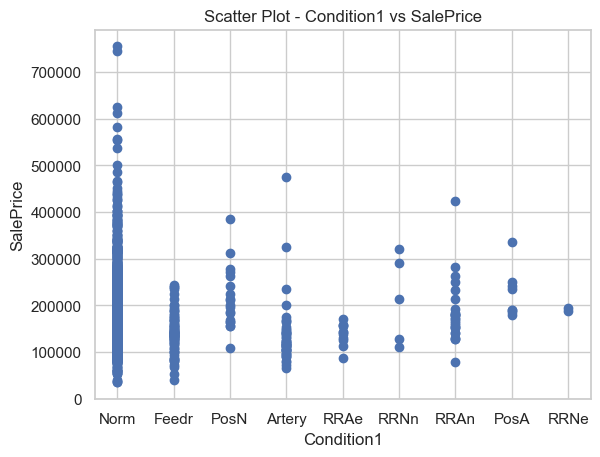

In [23]:
plt.scatter(df_train['Condition1'], df_train['SalePrice'])
plt.xlabel('Condition1')
plt.ylabel('SalePrice')
plt.title('Scatter Plot - Condition1 vs SalePrice')

Для дому з Id=1299 ми могли б обґрунтувати низьку ціну тим, що вона має параметр Condition1=FeedR (точки з цим параметром зазвичай мають нижчу ціну), а ось з Id=524 Condition1 = PosN навряд чи негативно впливає на ціну, швидше навпаки. Схоже, причина низької ціни цих будинків - інша. 

5.5. Побудуйте діаграму розсіювання, в якій по осі ОХ - `Neighborhood`, по осі ОУ - `SalePrice`.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

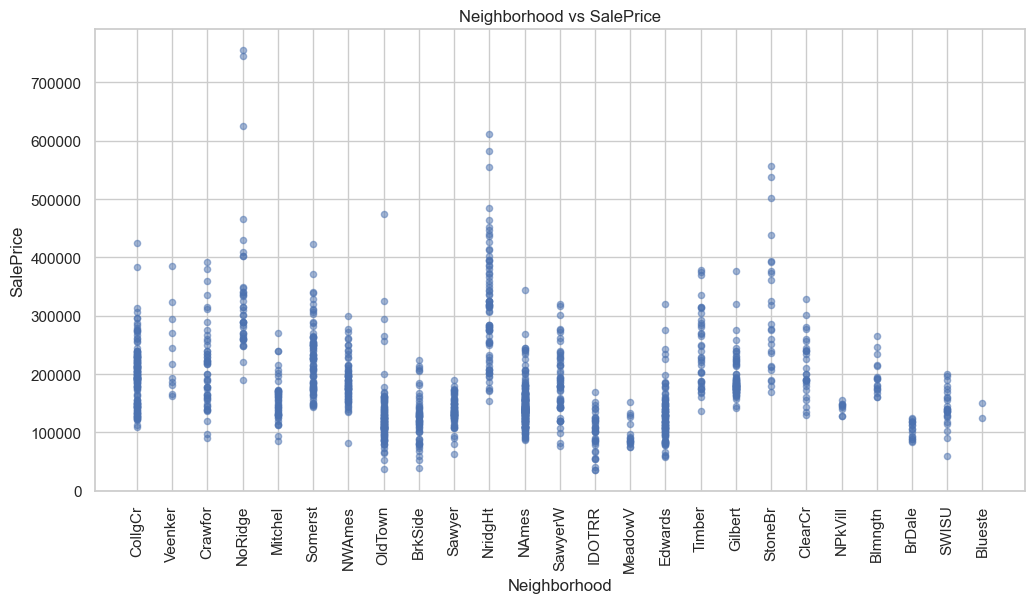

In [24]:
df_train.plot.scatter(x='Neighborhood', y='SalePrice', figsize=(12, 6), alpha=0.5)

plt.xlabel('Neighborhood') 
plt.ylabel('SalePrice') 
plt.title('Neighborhood vs SalePrice')  

plt.xticks(rotation=90) 

In [ ]:
# будинок в Noridge явно дорожчий ніж в edwards з діаграми вище:)

Погляньте на `SalePrice` за різним Neighborhood, чи бачите ви закономірності?  
Виведіть mean, std, min, max, mode значення `SalePrice` для різних значень Neighborhood (оптимально - з використанням функцій `groupby()` та `describe()`), відсортуйте значення за спаданням mean, зробіть градієнтне зафарбовування таблиці. Чи підтверджуються знайдені закономірності з діаграми?

In [ ]:
# Чи підтверджуються знайдені закономірності з діаграми? - так. 

In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [26]:
statistics = df_train.groupby('Neighborhood')['SalePrice'].describe()
statistics = statistics.sort_values(by='mean', ascending=False)
cm = sns.light_palette("green", as_cmap=True)
styled_statistics = statistics.style.background_gradient(cmap=cm)
styled_statistics

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
NoRidge,41.000000,335295.317073,121412.658640,190000.000000,265000.000000,301500.000000,341000.000000,755000.000000
NridgHt,77.000000,316270.623377,96392.544954,154000.000000,253293.000000,315000.000000,374000.000000,611657.000000
StoneBr,25.000000,310499.000000,112969.676640,170000.000000,213500.000000,278000.000000,377426.000000,556581.000000
Timber,38.000000,242247.447368,64845.651549,137500.000000,186900.000000,228475.000000,286115.750000,378500.000000
Veenker,11.000000,238772.727273,72369.317959,162500.000000,184250.000000,218000.000000,282000.000000,385000.000000
Somerst,86.000000,225379.837209,56177.555888,144152.000000,177975.000000,225500.000000,252919.500000,423000.000000
ClearCr,28.000000,212565.428571,50231.538993,130000.000000,183750.000000,200250.000000,242225.000000,328000.000000
Crawfor,51.000000,210624.725490,68866.395472,90350.000000,159250.000000,200624.000000,239000.000000,392500.000000
CollgCr,150.000000,197965.773333,51403.666438,110000.000000,152958.750000,197200.000000,225725.000000,424870.000000


Схоже будинки  Id=524 та Id=1299 мають neighborhood, у якому ціни будинків низькі. Цим можливе й обґрунтовується ціна. Але це лише гіпотеза.

6. Проаналізуємо пропущені значення

6.1. За допомогою бібліотеки `missingno` виведіть у вигляді bar chart кількість відсутніх значень у колонках датасету. Щоб переглядати було комфортно, виведіть на одній фігурі дві панелі розташовані вертикально (тобто друга під першою), де на першій панелі буде інформація про відсутні значення у перших 40 колонках, а на другій - у всіх інших.

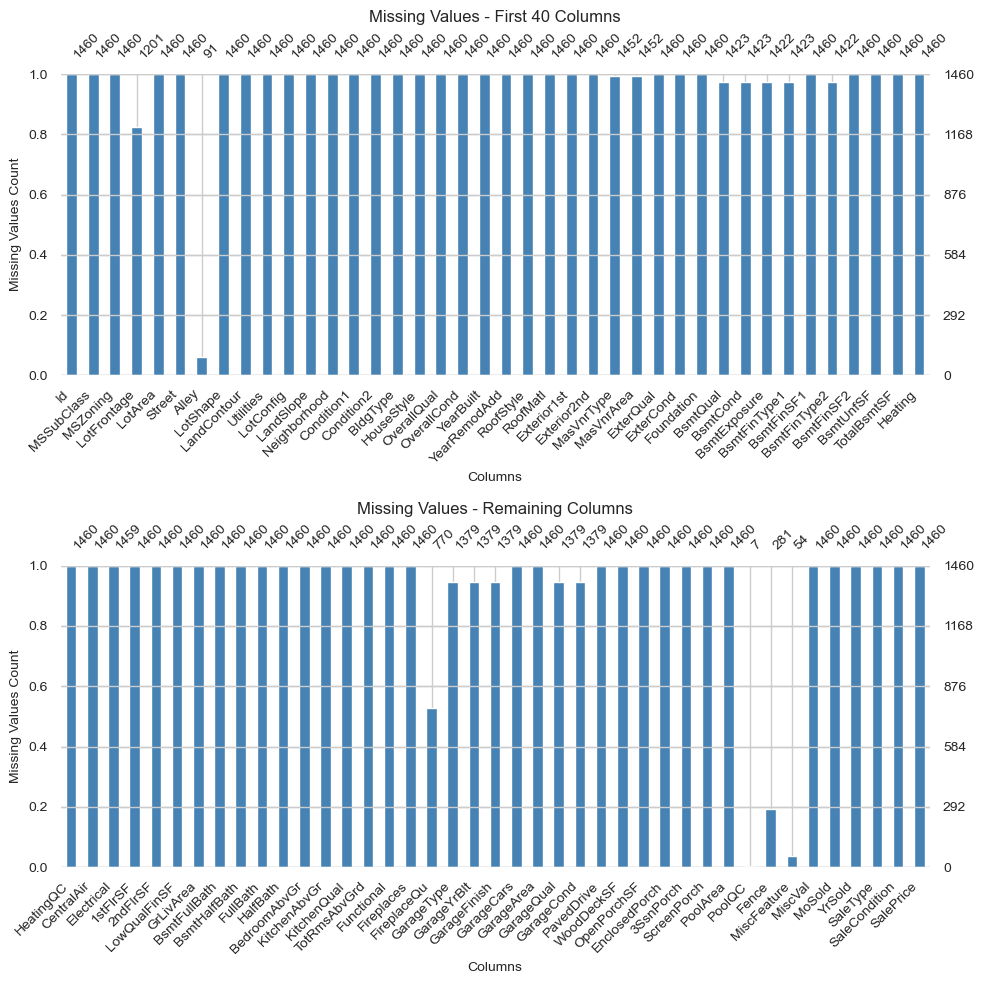

In [27]:
first_40_cols = df_train.columns[:40]
remaining_cols = df_train.columns[40:]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
msno.bar(df_train[first_40_cols], ax=axes[0], color='steelblue', fontsize=10)

axes[0].set_title('Missing Values - First 40 Columns', fontsize=12)
axes[0].set_xlabel('Columns', fontsize=10)
axes[0].set_ylabel('Missing Values Count', fontsize=10)

msno.bar(df_train[remaining_cols], ax=axes[1], color='steelblue', fontsize=10)
axes[1].set_title('Missing Values - Remaining Columns', fontsize=12)
axes[1].set_xlabel('Columns', fontsize=10)
axes[1].set_ylabel('Missing Values Count', fontsize=10)
plt.tight_layout()
plt.show()

6.2 Використовуючи візуалізацію, визначте, в яких колонках немає більше половини записів. Відповідь – текстом назви колонок.

In [ ]:
#немає більше 50% : Alley, FireplaceQu, Fence, MiscFeature

6.2.1. Проведемо подібний аналіз не візуально, а аналітично, щоб ви могли вибрати те, що вам зручніше.
Порахуйте, скільки значень відсутні в кожній колонці датафрейму `df_train` (використовуйте функцію `isna()` і google за необхідності).  
Запишіть результат у змінну `count_na`.


In [ ]:
# у графіках зверху я наводила значення - скільки заповнених у кожній колонці

In [28]:
count_na = df_train.isna().sum()
count_na

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

6.2.2. Користуючись змінною `count_na`, виведіть колонки, у яких відсоток відсутніх значень строго більше 50. 
Відповіддю має бути структура `pd.Series` з індексом - назва колонки та значеннями - відсоток відсутніх значень у цій колонці.

In [29]:
na_percentage = count_na[count_na / len(df_train) > 0.5] / len(df_train) * 100
na_percentage

Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

Порівняйте отримані результати з тими, що ви зазначили в п.6.1, вони повинні збігатися.

In [ ]:
збігаються, на щастя.

6.3. Виведіть матричне відображення відсутніх значень за допомогою бібліотеки missingno. Знайдіть, яка максимальна кількість заповнених даних в одному рядку і яка мінімальна. Кількість заповнених даних на одному рядку обмежена зверху кількістю колонок.


Увага: щоб відповісти на запитання коректно користуючись візуалізацією, вам необхідно вивести тут на **одній** діаграмі **всі** колонки відразу (вони помістяться).

<Axes: >

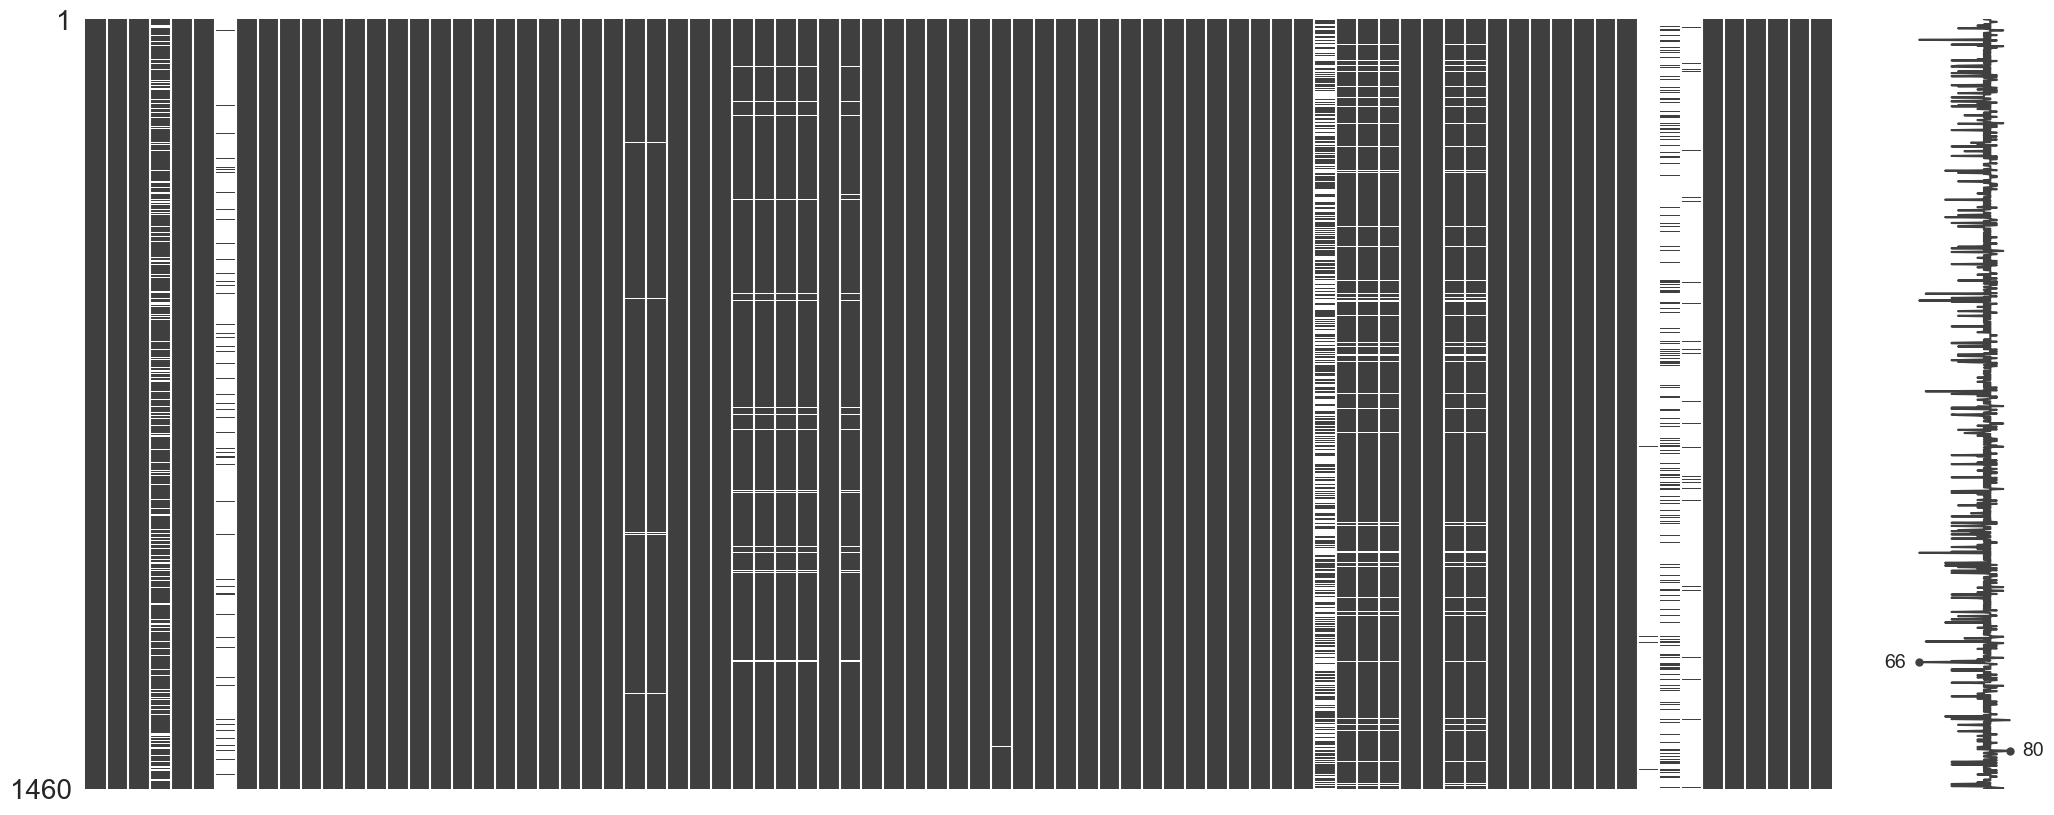

In [30]:
msno.matrix(df_train)

In [31]:
filled_counts = df_train.count(axis=1)
max_filled = filled_counts.max()
max_filled

80

In [32]:
min_filled = filled_counts.min()
min_filled

66

6.4. Виведіть теплову картку відсутніх значень за допомогою бібліотеки `missingno`.  
Якщо немає змінної `GarageType`, у яких ще змінних теж будуть відсутні значення?

<Axes: >

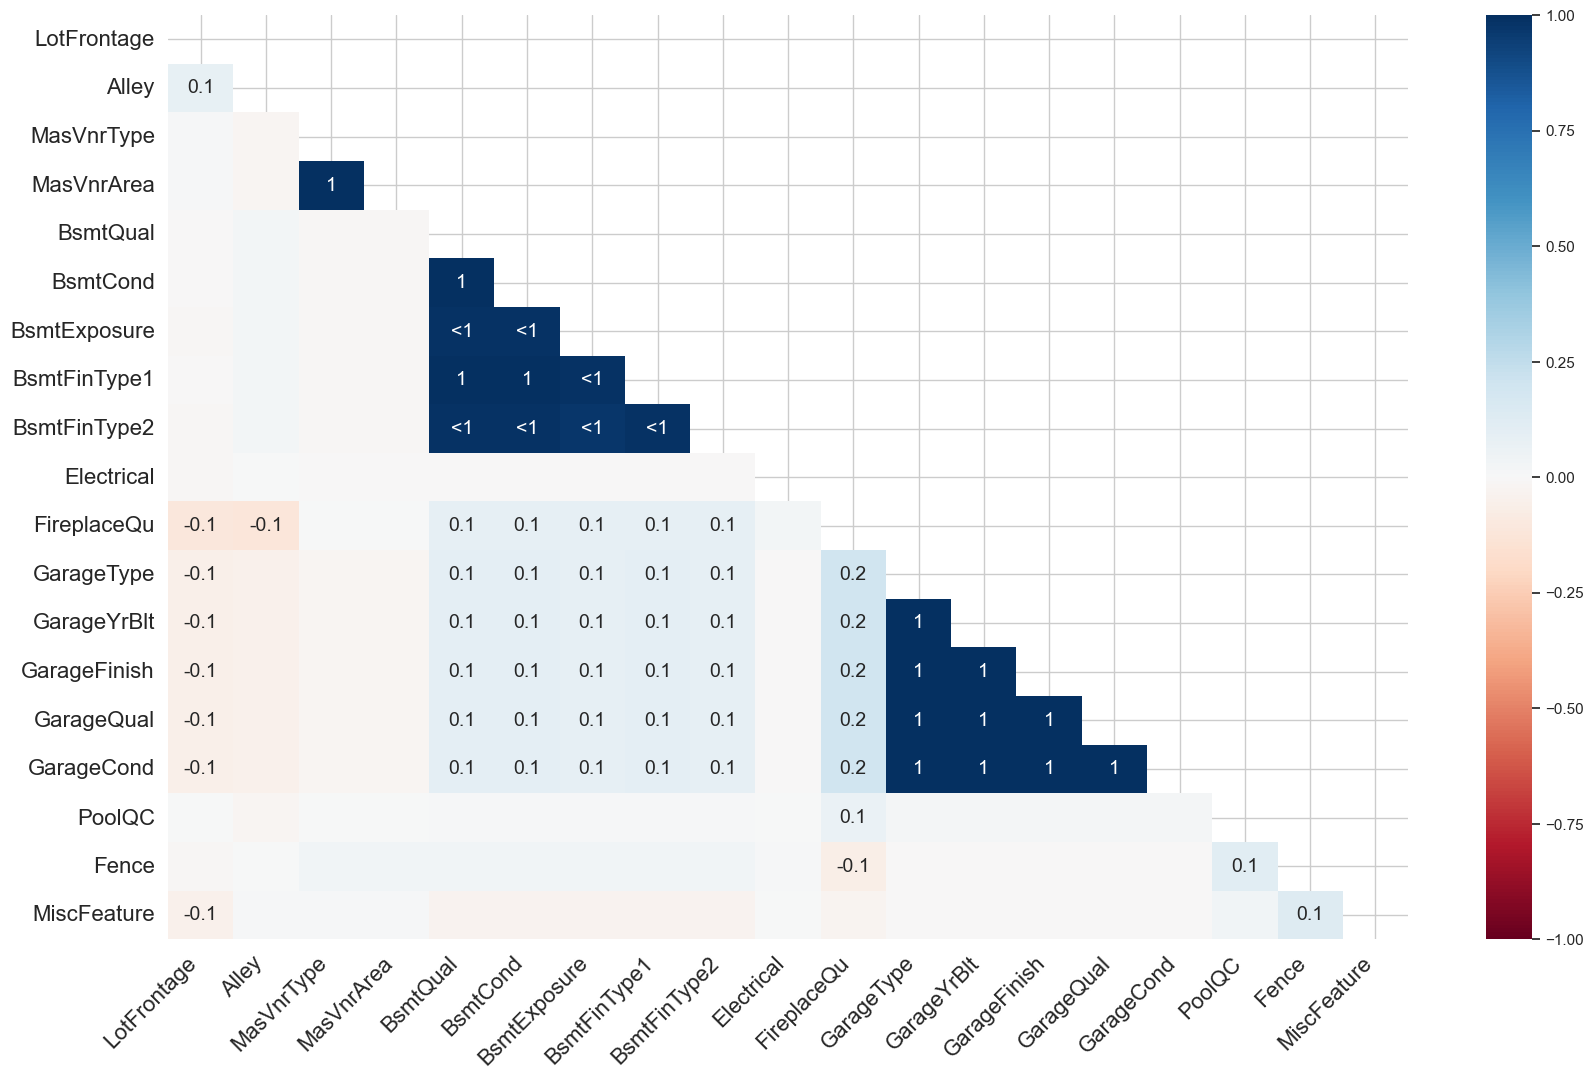

In [33]:
msno.heatmap(df_train)

In [ ]:
# точно будуть відсутні значення всіх змінних повʼязаних з характеристиками гаража, 
# GarageYrBlt,GarageFinish, GarageCars,GarageArea,GarageQual,GarageCond